# [作業目標]
- 對資料做更多處理 : 顯示特定欄位的統計值與直方圖

# [作業重點]
- 試著顯示特定欄位的基礎統計數值 (In[4], Out[4], Hint : describe())
- 試著顯示特定欄位的直方圖 (In[5], Out[5], Hint : .hist())

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

# 設定 data_path
dir_data = './data/'

In [2]:
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

## 練習時間

觀察有興趣的欄位的資料分佈，並嘗試找出有趣的訊息
#### Eg
- 計算任意欄位的平均數及標準差
- 畫出任意欄位的[直方圖](https://zh.wikipedia.org/zh-tw/%E7%9B%B4%E6%96%B9%E5%9B%BE)

### Hints:
- [Descriptive Statistics For pandas Dataframe](https://chrisalbon.com/python/data_wrangling/pandas_dataframe_descriptive_stats/)
- [pandas 中的繪圖函數](https://amaozhao.gitbooks.io/pandas-notebook/content/pandas%E4%B8%AD%E7%9A%84%E7%BB%98%E5%9B%BE%E5%87%BD%E6%95%B0.html)


In [4]:
#計算資料類型數量
dtype_df = app_train.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df = dtype_df.groupby("Column Type").aggregate('count').reset_index()
dtype_df

,Column Type,Count
0,int64,41
1,float64,65
2,object,16


In [5]:
#先對資料類型作分類，將name存至列表
int_features = []
float_features = []
object_features = []
for dtype, feature in zip(app_train.dtypes, app_train.columns):
    if dtype == 'float64':
        float_features.append(feature)
    elif dtype == 'int64':
        int_features.append(feature)
    else:
        object_features.append(feature)

In [6]:
#針對int整數部分作平均數與標準差
int_mean = app_train[int_features].mean()
int_sdt = app_train[int_features].std()
int_data = np.vstack((int_features, int_mean, int_sdt))
int_data = pd.DataFrame(int_data.T, columns = ['Name', 'Mean', 'Sdt'])
int_data.head()

,Name,Mean,Sdt
0,SK_ID_CURR,278180.51857657125,102790.17534842374
1,TARGET,0.08072881945686496,0.272418645647685
2,CNT_CHILDREN,0.4170517477423572,0.7221213844389558
3,DAYS_BIRTH,-16036.995066843137,4363.988631785526
4,DAYS_EMPLOYED,63815.04590404896,141275.7665186621


In [7]:
#針對float浮點數部分作平均數與標準差
float_mean = app_train[float_features].mean()
float_sdt = app_train[float_features].std()
float_data = np.vstack((float_features, float_mean, float_sdt))
float_data = pd.DataFrame(float_data.T, columns = ['Name', 'Mean', 'Sdt'])
float_data.head()

,Name,Mean,Sdt
0,AMT_INCOME_TOTAL,168797.9192969845,237123.14627883647
1,AMT_CREDIT,599025.9997057016,402490.776995946
2,AMT_ANNUITY,27108.573909183444,14493.737315117392
3,AMT_GOODS_PRICE,538396.2074288895,369446.4605400129
4,REGION_POPULATION_RELATIVE,0.02086811205778947,0.013831280122699869


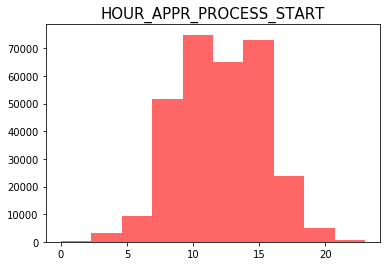

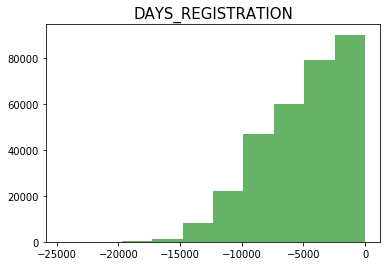

In [8]:
#呈現int第14個與float第5個

i = 14
plt.title("%s" %(int_features[i]),size = 15)
plt.hist(app_train[int_features[i]], alpha = 0.6, color = 'r')
plt.show()

i = 5
plt.title("%s" %(float_features[i]),size = 15)
plt.hist(app_train[float_features[i]], alpha = 0.6, color = 'g')

plt.show()